In [1]:
#importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import codecs
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

In [2]:
pip install arff

  Created wheel for arff: filename=arff-0.9-cp36-none-any.whl size=4970 sha256=bfa15f9bd64403d8ff8b9fb668ca6dbde7be2e98a6c4b49309d5f80bb29aacd3
  Stored in directory: /root/.cache/pip/wheels/04/d0/70/2c73afedd3ac25c6085b528742c69b9587cbdfa67e5194583b
Successfully built arff


In [3]:
#lire la base de données
df=pd.read_csv('/content/Caesarian Section Classification Dataset(CSV).csv')

In [4]:
df

,Age,Delivey No,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,1,Timely,High,apt,No
1,26,2,Timely,Normal,apt,Yes
2,26,2,Premature,Normal,apt,No
3,28,1,Timely,High,apt,No
4,22,2,Timely,Normal,apt,Yes
...,...,...,...,...,...,...
75,27,2,Premature,Normal,apt,No
76,33,4,Timely,Normal,apt,Yes
77,29,2,Premature,High,apt,Yes
78,25,1,Latecomer,Low,apt,Yes


In [5]:
#explorer la base de données et préparaton des données
#afficher toute la base de données
pd.set_option('display.max_rows',df.shape[0]+1)

In [6]:
#explorer les valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                80 non-null     int64 
 1   Delivey No         80 non-null     int64 
 2   Delivery No        80 non-null     object
 3   Blood of Pressure  80 non-null     object
 4   Heart Problem      80 non-null     object
 5   Caesarian          80 non-null     object
dtypes: int64(2), object(4)
memory usage: 3.9+ KB


In [7]:
df.isnull().sum().sort_values(ascending=False)

Caesarian            0
Heart Problem        0
Blood of Pressure    0
Delivery No          0
Delivey No           0
Age                  0
dtype: int64

In [8]:
#transformer la base en 2 bases categorique et numerique
cat_data=[]
num_data=[]
for i,c in enumerate(df.dtypes):
  if c==object:
    cat_data.append(df.iloc[:,i])
  else:
    num_data.append(df.iloc[:,i])
cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()
cat_data


,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,Timely,High,apt,No
1,Timely,Normal,apt,Yes
2,Premature,Normal,apt,No
3,Timely,High,apt,No
4,Timely,Normal,apt,Yes
5,Premature,Low,apt,No
6,Timely,Normal,apt,No
7,Timely,Normal,apt,Yes
8,Timely,Normal,apt,No
9,Premature,Normal,apt,yes


In [9]:
#modifier les valeurs de la colonne caesarian de type catégorique au type numérique
Caesarian1_value={'yes':1,'Yes':1,'No':0}
Caesarian1=cat_data['Caesarian']
cat_data.drop('Caesarian',axis=1, inplace=True)
Caesarian1=Caesarian1.map(Caesarian1_value)
Caesarian1

0     0
1     1
2     0
3     0
4     1
5     0
6     0
7     1
8     0
9     1
10    0
11    1
12    0
13    0
14    1
15    0
16    0
17    1
18    1
19    1
20    0
21    1
22    0
23    1
24    1
25    0
26    1
27    0
28    1
29    0
30    0
31    1
32    1
33    1
34    1
35    1
36    0
37    0
38    0
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    0
47    1
48    0
49    1
50    0
51    1
52    0
53    0
54    1
55    0
56    1
57    1
58    1
59    1
60    0
61    1
62    1
63    1
64    0
65    1
66    1
67    0
68    1
69    0
70    1
71    1
72    0
73    0
74    1
75    0
76    1
77    1
78    1
79    0
Name: Caesarian, dtype: int64

In [10]:
#modifier les valeurs de la colonne pressureblood
PressBlood_value={'Low':0,'low':0,'High':2,'Normal':1}
PressBlood=cat_data['Blood of Pressure']
cat_data.drop('Blood of Pressure',axis=1, inplace=True)
PressBlood=PressBlood.map(PressBlood_value)
PressBlood


0     2
1     1
2     1
3     2
4     1
5     0
6     1
7     1
8     1
9     1
10    1
11    0
12    1
13    1
14    0
15    0
16    1
17    2
18    1
19    0
20    1
21    0
22    2
23    0
24    2
25    1
26    2
27    1
28    2
29    1
30    0
31    1
32    2
33    1
34    1
35    2
36    1
37    1
38    1
39    0
40    2
41    1
42    2
43    1
44    2
45    1
46    1
47    2
48    1
49    0
50    1
51    0
52    2
53    0
54    1
55    1
56    0
57    0
58    2
59    2
60    2
61    1
62    0
63    1
64    2
65    1
66    1
67    1
68    0
69    0
70    0
71    0
72    1
73    1
74    2
75    1
76    1
77    2
78    0
79    1
Name: Blood of Pressure, dtype: int64

In [11]:
#convertir les varibles categoriques en variables numeriques
le=LabelEncoder()
for i in cat_data:
  cat_data[i] = le.fit_transform(cat_data[i])
cat_data 

,Delivery No,Heart Problem
0,2,0
1,2,0
2,1,0
3,2,0
4,2,0
5,1,0
6,2,0
7,2,0
8,2,0
9,1,0


In [12]:
df1=pd.concat([cat_data,num_data,PressBlood,Caesarian1],axis=1)
df1

,Delivery No,Heart Problem,Age,Delivey No,Blood of Pressure,Caesarian
0,2,0,22,1,2,0
1,2,0,26,2,1,1
2,1,0,26,2,1,0
3,2,0,28,1,2,0
4,2,0,22,2,1,1
5,1,0,26,1,0,0
6,2,0,27,2,1,0
7,2,0,32,3,1,1
8,2,0,28,2,1,0
9,1,0,27,1,1,1


In [13]:
#statistqiues descriptives
#afficher les valeurs statistiques des variables numériques
df.describe()

,Age,Delivey No
count,80.000000,80.000000
mean,27.687500,1.662500
std,5.017927,0.794662
min,17.000000,1.000000
25%,25.000000,1.000000
50%,27.000000,1.000000
75%,32.000000,2.000000
max,40.000000,4.000000


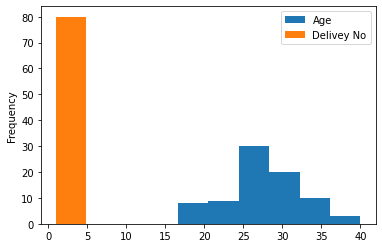

In [14]:
df.plot.hist()

In [15]:
df1.rename(columns={'Delivey No': 'nbrenfants', 'Delivery No': 'typgrossesse', 'Blood of Pressure': 'PressureBlood','Heart Problem': 'HeartProblem'}, inplace=True)
df.rename(columns={'Delivey No': 'nbrenfants', 'Delivery No': 'typgrossesse', 'Blood of Pressure': 'PressureBlood','Heart Problem': 'HeartProblem'}, inplace=True)
df1


,typgrossesse,HeartProblem,Age,nbrenfants,PressureBlood,Caesarian
0,2,0,22,1,2,0
1,2,0,26,2,1,1
2,1,0,26,2,1,0
3,2,0,28,1,2,0
4,2,0,22,2,1,1
5,1,0,26,1,0,0
6,2,0,27,2,1,0
7,2,0,32,3,1,1
8,2,0,28,2,1,0
9,1,0,27,1,1,1


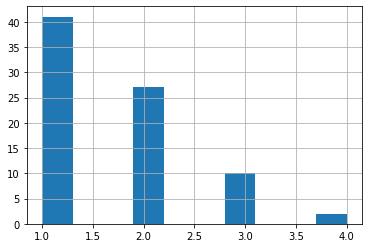

In [16]:
df1.nbrenfants.hist()

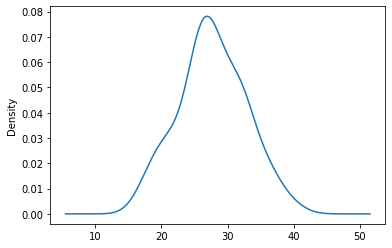

In [17]:
df1.Age.plot(kind = "kde")

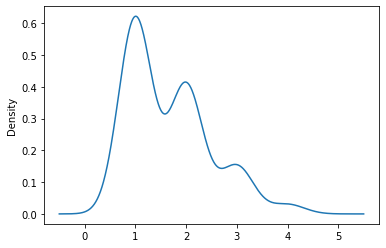

In [18]:
df1.nbrenfants.plot(kind = "kde")

In [19]:
df.typgrossesse.describe()

count         80
unique         3
top       Timely
freq          46
Name: typgrossesse, dtype: object

In [20]:
df.HeartProblem.describe()

count      80
unique      2
top       apt
freq       50
Name: HeartProblem, dtype: object

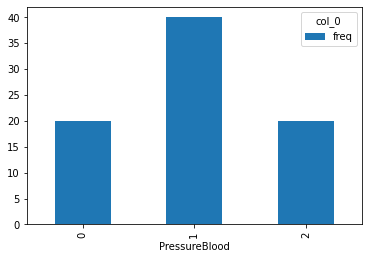

In [21]:
t = pd.crosstab(df1.PressureBlood, "freq")
t.plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33c9721128>,
      dtype=object)

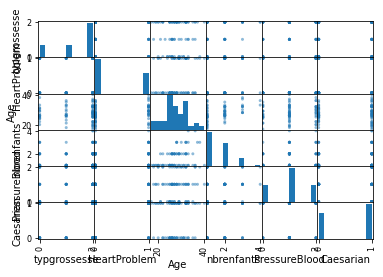

In [22]:
scatter_matrix(df1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


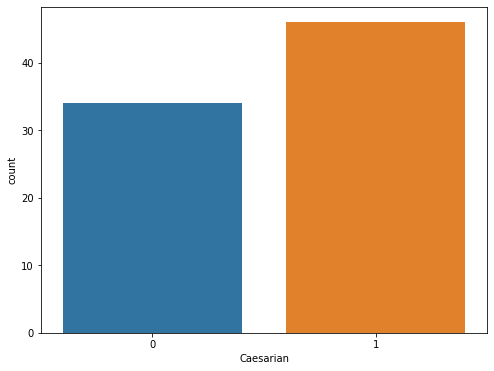

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(df1['Caesarian'])

In [24]:
#analyse exploratoire de notre base de données préparée
#la variable Caesarian1
df1.Caesarian.value_counts()

1    46
0    34
Name: Caesarian, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


le pourcentage des op césariennes : 0.575
le pourcentage des op non césariennes : 0.425


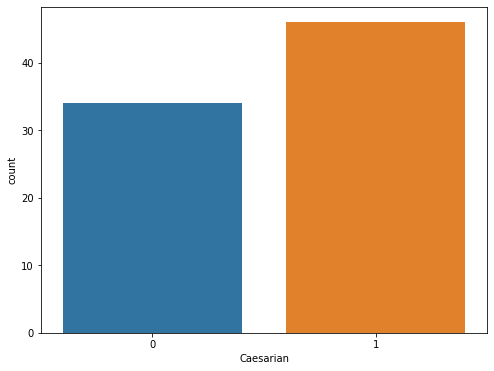

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(Caesarian1)
yes=Caesarian1.value_counts()[1]/len(Caesarian1)
no=Caesarian1.value_counts()[0]/len(Caesarian1)
print(f'le pourcentage des op césariennes : {yes}')
print(f'le pourcentage des op non césariennes : {no}')
# on peut voir que le nombre de femmes ayants effectué des opérations césariennes est plus élevé que celui des femmes sans césarienne

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


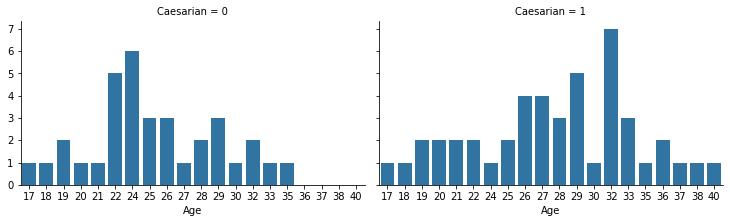

In [26]:
#effets des variables sur la variable Caesarian
#effet de la variable Age 
grid=sns.FacetGrid(df1,col='Caesarian',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Age')
#l'operation est encouragée pour les femmes autour des trentaines et découragé pour celles autour des vingtaines
#l'age a un effet sur la variable caesarian

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


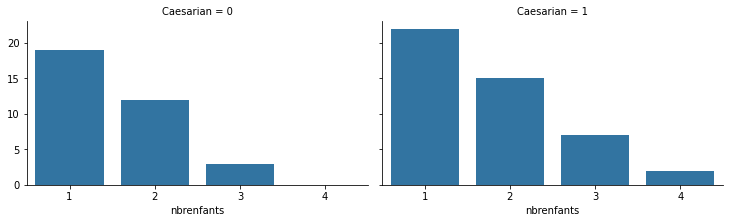

In [27]:
#effet de la varible nbrenfants
grid=sns.FacetGrid(df1,col='Caesarian',size=3.2,aspect=1.6)
grid.map(sns.countplot,'nbrenfants')
#on déduit que le nombre  d'opérations cesariennes est plus élevé chez les femmes ayant moins d'enfants et surtout lorsqu'il s'agit de leur premier enfant 
#mais aussi non necessité d'operation pour les femmes ayant moins d'enfants 
#conclusion: la variable nbrenfants n'a pas un effet majeur sur l'accord d'operation cesarienne

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


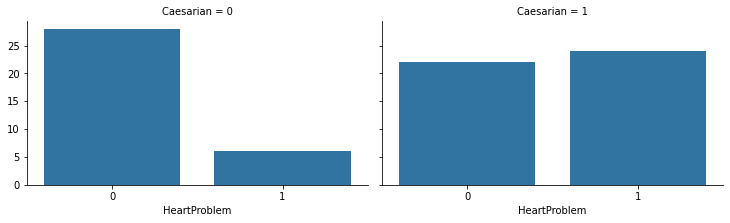

In [28]:
#effet de la variable HeartProblem
grid=sns.FacetGrid(df1,col='Caesarian',size=3.2,aspect=1.6)
grid.map(sns.countplot,'HeartProblem')
#pas d'effet majeur sur la decision d'operation cesarienne selon la variable HeartProblem
#mais les femmes n'ayant pas de probleme cardiovasculaire effectuent moins d'operations 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


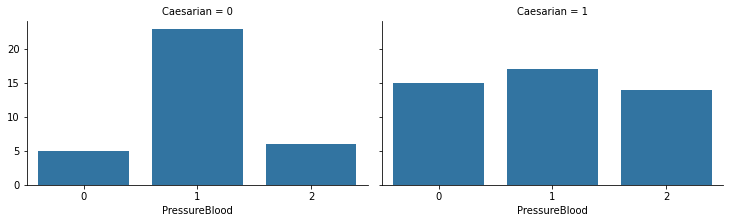

In [29]:
#effet de la variable BloodPressure
grid=sns.FacetGrid(df1,col='Caesarian',size=3.2,aspect=1.6)
grid.map(sns.countplot,'PressureBlood')
#les femmes ayants une pression arterielle normale effectuent moins d'operations cesariennes 
#la pression arterielle n'a pas d'effet sur les femmes ayants effectué une operation 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


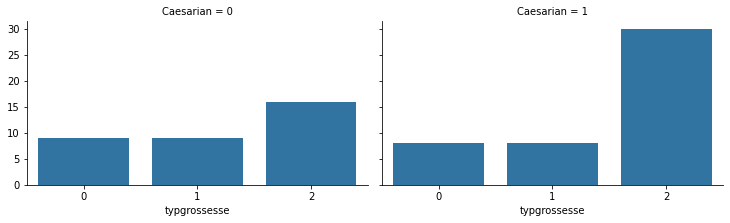

In [30]:
#effet de la variable typgrossesse	
grid=sns.FacetGrid(df1,col='Caesarian',size=3.2,aspect=1.6)
grid.map(sns.countplot,'typgrossesse')
#plus les femmes auront une grossesse retardée plus elles effectuent une operation
#conclusion: la variable typegrossesse affecte la variable Caesarian

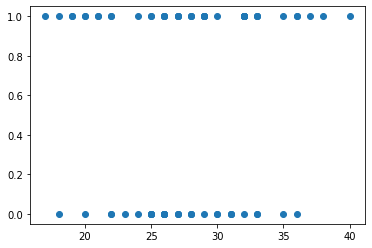

In [31]:
#effet de la variable Age
plt.scatter(df1['Age'],df1['Caesarian'])
#on peut affiner notre analyse precedente de l'effet de la variable Age sur la descision d'operation et on peut déduire qu'il n'affiche pas d'effet
#majeur de la variable sur la decision d'operation ou pas 

In [32]:
#on peut aussi faire une autre analyse avec les medianes afin de prouver des relations ou pas 
df1.groupby('Caesarian').median()
#donc on peut voir une correlation entre l'age est la decsion de l'operation telque les operations sont acceptées plus pour les femmes les plus agées
#Mais aussi pour les grossesses retardées comme évoqué précedement et à lesquelles s'ajoute les problemes cardiovasculaires mais la variable PressureBlood reste 
#sans effet sur la decison d'operation

,typgrossesse,HeartProblem,Age,nbrenfants,PressureBlood
Caesarian,,,,,
0,1.0,0.0,26.5,1.0,1.0
1,2.0,1.0,28.0,2.0,1.0


In [33]:
#Réalisation du modèle machine learning
#divisier la base de données en base d'entrainement et base de test
sss=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train,test in sss.split(df1,Caesarian1):
  df1_train,df1_test=df1.iloc[train],df1.iloc[test]
  Caesarian1_train,Caesarian1_test=Caesarian1.iloc[train],Caesarian1.iloc[test]

print('df1_train taille est ', df1_train.shape)
print('df1_test taille est ', df1_test.shape)
print('Caesarian1_train taille est ', Caesarian1_train.shape)
print('Caesarian1_test taille est ', Caesarian1_test.shape)


df1_train taille est  (64, 6)
df1_test taille est  (16, 6)
Caesarian1_train taille est  (64,)
Caesarian1_test taille est  (16,)


In [34]:
#on applique des algorithmes de machines learning associés au problème de classification posé:Logistic Regresion, KNN, DecisionTree

models={
    'LogisticRegression':LogisticRegression(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1,random_state=42)
}

#on crèe la fonction de précison des modeles
def preci(Caesarian1_true,Caesarian1_pred, retu=False):
  prec=accuracy_score(Caesarian1_true,Caesarian1_pred)
  if retu:
    return prec
  else:
    print(f'la précision du modèle est :{prec} ')

#on crèe la fonction d'application des modèles
def train_test_eval(models,df1_train,Caesarian1_train,df1_test,Caesarian1_test):
  for name, model in models.items():
    print(name,':')
    model.fit(df1_train,Caesarian1_train)
    preci(Caesarian1_test,model.predict(df1_test))
    print('-'*30)
train_test_eval(models,df1_train,Caesarian1_train,df1_test,Caesarian1_test)


LogisticRegression :
la précision du modèle est :1.0 
------------------------------
KNeighborsClassifier :
la précision du modèle est :0.875 
------------------------------
DecisionTreeClassifier :
la précision du modèle est :1.0 
------------------------------


In [35]:
#on va essayer d'appliquer les modeles sur les variables en corrélation avec notre variable 
df2=df1[['typgrossesse'	,'HeartProblem'	,'Age'	,'nbrenfants']]
sss=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train,test in sss.split(df2,Caesarian1):
  df2_train,df2_test=df2.iloc[train],df2.iloc[test]
  Caesarian1_train,Caesarian1_test=Caesarian1.iloc[train],Caesarian1.iloc[test]

train_test_eval(models,df2_train,Caesarian1_train,df2_test,Caesarian1_test)
#conclusion: on peut voir que le modele DecisionTree est le plus précis dans notre problème avec une precision de 0.8125



LogisticRegression :
la précision du modèle est :0.625 
------------------------------
KNeighborsClassifier :
la précision du modèle est :0.6875 
------------------------------
DecisionTreeClassifier :
la précision du modèle est :0.8125 
------------------------------


In [36]:
#appliquer le modele du DecisionTree sur notre base de données
model= DecisionTreeClassifier()
model.fit(df2,Caesarian1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
#enregistrer notre modele pour le deploiment dans l'application
pickle.dump(model,open('model.pkl','wb'))